# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0383 Подопригора Иван. Вариант №61

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** - элемент сети, представляющий собой пару акторов и возможнную связь между ними.

Взаимная диада: $D_{i,j} = (1, 1)$

Асимметричная диада: $D_{i,j} = (0, 1)$ или $D_{i,j} = (1, 0)$

Нулевая диада: $D_{i,j} = (0, 0)$

**Цензус диад** - это тройка чисел (M,A,N):
- M = $\sum_{i<j}X_{ij}X_{ji}$
- A = $X_{++}-2M$
- N = $\binom{g}{2}-A-M$

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе: $-\infty < \rho_{kp} \leq 1$

Индекс взаимности Каца-Пауэлла на ожидании количества взаимных диад, предполгая, что выбор делается акторами случайным образом.

При свободном выборе:

- Оценка $p_{kp}$ по методу моментов.
${\rho{'}_{kp} = \frac {2(g-1)^2M-L^2+L_2}{L(g-1)^2-L^2+L_2}},$
где $L = \sum_i x_{i+}$, $L_2 = \sum_i x^2_{i+}$

- Вероятность того, что акторы имеют взаимные отношения.
$\frac {x_{i+}x_{j+}}{(g-1)^2}$

При фиксированном выборе:

- Каждый актор делает $d$ выборов из $(g-1)$ акторов, доступных для выбора.

- Оценка $\rho_{kp}$ по методу моментов.
$\hat \rho_{kp} = \frac {2(g-1)M-gd^2}{gd(g-1-d)}$

- Вероятность взаимного выбора между любой произвольной парой акторов.
$\frac {d^2}{(g-1)^2}$

**Индекс взаимности Бандиопадхьяйя** - основан на минимальном и максимальном значениях количества взаимных диад.
$\rho_{B} = \frac{M - M_{min}}{M_{max} - M_{min}},$$
Где:
- $M_{min} = max_{0 \leq t \leq g}f(t)$

- $M_{max} = \lfloor \frac{1}{2}(\sum_{i=1}^g - max_{0 \leq t \leq g}g(t)) \rfloor$

- $f(t) = \sum_{i=1}^tx_{i+} - t(g-1) - \binom{t}{2}$ 

- $g(t) = \sum_{i=1}^tx_{i+} - t(t-1) - \sum_{i=t+1}^gmin(t, x_{i+})$

$|G_d(\cal {N})| = 2^{g(g - 1)}$, где $G_d(\cal {N})$ - множество всех возможных орграфов без петель с g узлами

Вероятность получить социоматрицу $x$: $P(X = x) = 2^{g(g - 1)}$

Вероятность появления дуги между акторами для равномерного распределения: 
$P(X_{ij} = 1) = \begin{cases}
    \frac{1}{2}, i \ne j\\
    0, i = j
\end{cases}$

Вероятность появления дуги между акторами для распределения Бернулли:
$P(X_{ij} = 1) = \begin{cases}
    p_{ij}, i \ne j\\
    0, i = j
\end{cases}$

**Статистические гипотезы для распределения Бернулли**:

Нулевая гипотеза $H_0$: 
$L \sim B(g(g - 1), P_0)$

Статистика: 
$z_l = \frac{l - E(L)}{\sqrt {D(L)}} = \frac {l-P_0g(g-1)}{\sqrt {P_0(1-P_0)g(g-1)}},$
где $l = \sum_{i = 1}^g\sum_{j = 1}^gx_{ij}$

Такая статистика является приблизительно стандартным нормальным распределением при заданном уровне значимости.

**Доверительный интервал для оценки $P$:**

Оценка параметра $P$: $\hat {P} = \frac{l}{g(g - 1)}$

Доверительный интервал:

$\hat {P}_{lower} \leq P \leq  \hat {P}_{upper}$

$\hat {P}_{lower} = \hat {P} - z_{\frac {\alpha}{2}} \sqrt {\frac {\hat {P}(1 - \hat{P})}{g(g - 1)}}$

$\hat {P}_{upper} = \hat {P} + z_{\frac {\alpha}{2}} \sqrt {\frac {\hat {P}(1 - \hat{P})}{g(g - 1)}}$

$z_{\frac{\alpha}{2}}$: $\Phi(z_{\frac{\alpha}{2}}) = 0.5 - \frac{\alpha}{2}$

**Оценка вероятности $P$ для распределения Бернулли:**

Количество дуг: $L \sim B(g(g - 1), P_0)$

Вероятность, что количество дуг равно $l$: $P(L = l) = \binom {g(g - 1)}{l} = P_0^l(1 - P_0)^{g(g - 1) - l}$

Математическое ожидание: $E(L) = P_0g(g - 1)$

Дисперсия: $D(L) = P_0(1 - P_0)g(g - 1)$


## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать

## Выполнение работы


In [3]:
library(statnet)
library(igraph)

Задача 1. С помощью библиотеки igraph был смоделирован случайный орграф на основе модели Эрдеша—Реньи.

In [10]:
g <- 91
p <- 0.69
P0 <- 0.74
a <- 0.05
graph <- erdos.renyi.game(g, p, directed = TRUE)

Модель Эрдеша-Реньи состоит в том, что каждое возможное ребро добавляется в граф с константной вероятностью P. (Описание из документации: This model is very simple, every possible edge is created with the same constant probability.)

Задача 2. Сгенерированный орграф был отображен на экране.

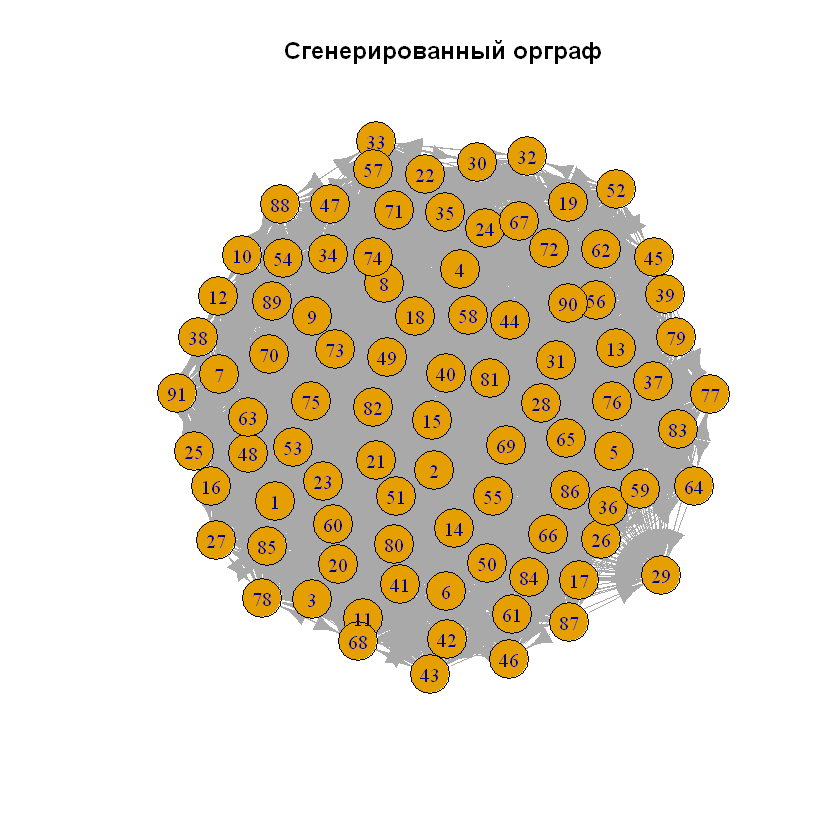

In [11]:
plot(graph, layout = layout_with_fr(graph), main = "Сгенерированный орграф")


Задача 3. Была вычислена пятичисловая сводка сети.

In [99]:
cat("(a) Размер сети: ", gorder(graph), "\n")
cat("(b) Плотность сети: ", edge_density(graph), "\n")
cat("(с) Число компонент: ", components(graph)$no, "\n")
cat("(d) Диаметр сети: ", diameter(graph), '\n')
cat("(e) Коэффициент кластеризации: ", transitivity(graph), '\n')

(a) Размер сети:  91 
(b) Плотность сети:  0.6855922 
(с) Число компонент:  1 
(d) Диаметр сети:  2 
(e) Коэффициент кластеризации:  0.9025482 


Задача 4. Был вычислен цензус диад.

In [100]:
census <- dyad_census(graph)
cat("Количество взаимных диад: ", census$mut, "\n")
cat("Количество асимметричных диад: ", census$asym, "\n")
cat("Количество нулевых диад: ", census$null, "\n")

Количество взаимных диад:  1920 
Количество асимметричных диад:  1775 
Количество нулевых диад:  400 


Вывод: в сгенерированном графе больше всего взаимных диад и меньше всего нулевых, т.к. вероятность появления ребра между двумя вершинами во время генерации была довольно высока.

Задача 5. Была вычислена оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе.

In [101]:
d <- 45 # фиксированное число
cat("Оценка при фиксированном выборе: ", (2*(g-1)*census$mut - g * d^2)/(g*d*(g - 1 - d)), "\n")
X <- as.matrix(as_adjacency_matrix(graph)) # матрица смежности
L <- sum(rowSums(X))
L2 <- sum(rowSums(X)^2)
cat("Оценка при свободном выборе: ",(2*(g - 1)^2 * census$mut - L^2 + L2)/(L*(g - 1)^2 - L^2 + L2), "\n")

Оценка при фиксированном выборе:  0.8754579 
Оценка при свободном выборе:  -0.005355884 


Вывод: при свободном выборе акторы имеют большую тенденцию к образованию асимметричных и нулевых диад, чем при фиксированном выборе.

Задача 6. Была вычислена вероятность того, что связь будет взаимной для каждого случая.

In [104]:
tmp<-(d / (g-1)) * ((d/(g-1)) + ((2*(g-1)*census$mut - g * d^2)/(g*d*(g - 1 - d)))*(g - 1 - d) / (g - 1))
cat("Вероятность того, что связь будет взаимной для фиксированного выбора: ", tmp, "\n")
tmp <- mean((rowSums(X) * colSums(X))/(g - 1)^2)
cat("Вероятность того, что связь будет взаимной для свободного выбора: ", tmp, "\n")


Вероятность того, что связь будет взаимной для фиксированного выбора:  0.4688645 
Вероятность того, что связь будет взаимной для свободного выбора:  0.4702211 


Задача 7. Был вычислен индекс взаимности Бандиопадхьяйя.

In [106]:
f_t <- function(t){
    return(sum(rowSums(X)[1:t]) - t * (g - 1) - choose(t, 2))
} 
g_t <- function(t){
    min_sum <- 0
    for (i in (t+1):g){
        min_sum <- min_sum + min(t, rowSums(X)[i])
    }
    return(sum(rowSums(X)[1:t]) - t * (t - 1) - min_sum)
}

g_res <- (1:g-1)
for (t in 1:(g-1)) {
    g_res[t] <- g_t(t)
}

f_res <- (1:g-1)
for (t in 1:(g-1)) {
    f_res[t] <- f_t(t)
}

M_max <- floor(0.5 * sum(rowSums(X)[1:g]) - max(g_res))
M_min <- max(f_res)

cat("Индекс взаимности Бандиопадхьяйя: ", (census$mut - M_min)/(M_max - M_min), "\n")

Индекс взаимности Бандиопадхьяйя:  0.6966121 


Вывод: полученный индекс взаимности примерно равен p.

Задача 8. Была проверена нулевая гипотеза о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1),\frac{1}{2})$ при уровне значимости $\alpha = 0.05$. Был определён максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [107]:
binom.test(sum(X), g*(g-1), p = 0.5)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 5615, number of trials = 8190, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6754113 0.6956408
sample estimates:
probability of success 
             0.6855922 


Вывод: p-value во много раз меньше $\alpha$ => нулевая гипотеза не выполняется; p-value, близкий к нулю, является максимальным уровнем значимости, при котором гипотеза не отвергается.

Задача 9.  Была проверена нулевая гипотеза о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g − 1),\frac{1}{2})$ при уровне значимости $\alpha = 0.05$. Был определён максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [108]:
binom.test(sum(X), g*(g-1), p = P0)


	Exact binomial test

data:  sum(X) and g * (g - 1)
number of successes = 5615, number of trials = 8190, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.74
95 percent confidence interval:
 0.6754113 0.6956408
sample estimates:
probability of success 
             0.6855922 


Вывод: p-value во много раз меньше $\alpha$ => нулевая гипотеза не выполняется; p-value, близкий к нулю, является максимальным уровнем значимости, при котором гипотеза не отвергается.

Задача 10. Был построен доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼).

In [109]:
z <- 1.96 # по таблице значений функции Лапласа (Ф(z) = 0.5 - (0.5/2))
estimation <- gsize(graph)/(g*(g-1))
p_lower <- estimation - z * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
p_upper <- estimation + z * sqrt((estimation * (1 - estimation))/(g * (g - 1)))
cat("Доверительный интервал: [", p_lower, ",", p_upper, "]")

Доверительный интервал: [ 0.6755369 , 0.6956475 ]

Вывод: p = 0.69 попадает в доверительный интервал, значит доверительный интервал вычислен верно.

## Выводы

В ходе выполнения данной лабораторной работы были получены навыки работы с математическими пакетами для статистического анализа социальных сетей; был проведен анализ случайно сгенерированного орграфа на 91 вершине с вероятностью направленого ребра для каждой упорядоченой пары вершин равной 0.69; была вычислена пятичисловая сводка для этого графа, вычислен цензус диад, взаимности Каца-Пауэла, индекс взаимности Бандиопадхьяйя, были проверены гипотезы о биномиальном распределении рёбер в графе, был построен доверительный интервал, в который попала вероятность p=0.69.